In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
# calssification works on linearly separable data

In [4]:
df.drop(columns=["EstimatedSalary"], inplace=True)

In [5]:
df.head()

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0


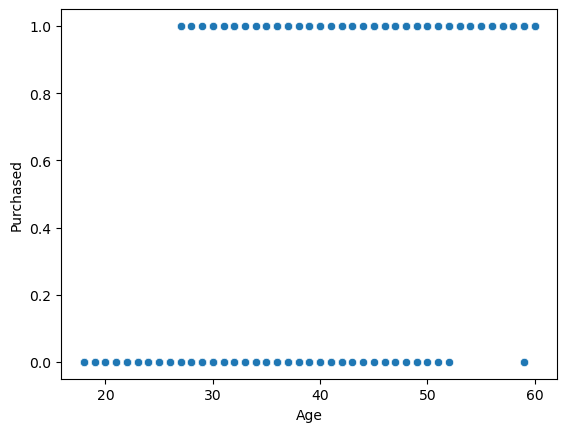

In [6]:
sns.scatterplot(x="Age",y="Purchased",data=df)
plt.show()

In [7]:
x=df[["Age"]]
y=df["Purchased"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lo=LogisticRegression()

In [12]:
lo.fit(x_train,y_train)

LogisticRegression()

In [13]:
lo.score(x_test,y_test)*100

91.25

In [14]:
lo.predict([[40]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

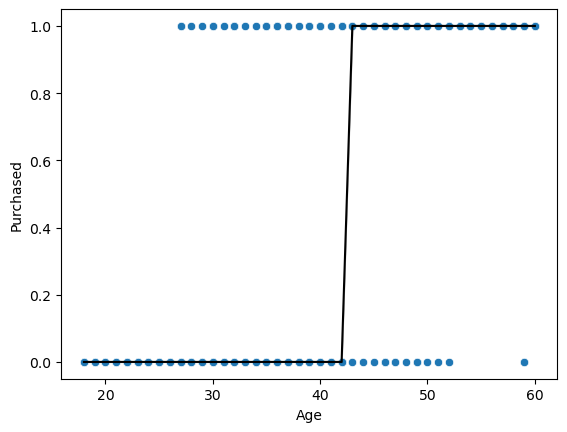

In [15]:
sns.scatterplot(x="Age",y="Purchased",data=df)
sns.lineplot(x="Age",y=lo.predict(x),data=df,c="black")
plt.show()

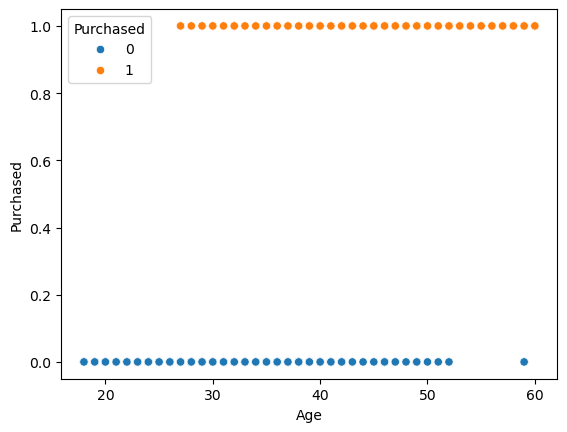

In [16]:
sns.scatterplot(x="Age",y="Purchased",data=df,hue="Purchased")

plt.show()

## to check linear dimensionality


In [17]:
df1=pd.read_csv("placement.csv")

In [18]:
df1.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


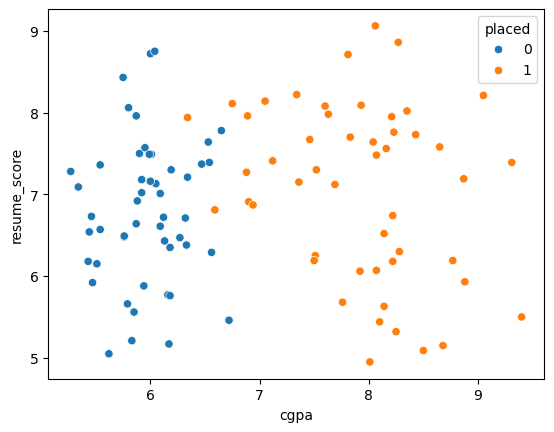

In [19]:
sns.scatterplot(x="cgpa",y="resume_score",data=df1,hue="placed")

plt.show()

In [20]:
x1=df1.iloc[:,:-1]
y1=df1["placed"]

In [21]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [22]:
lr1=LogisticRegression()
lr1.fit(x1_train,y1_train)

LogisticRegression()

In [23]:
lr1.score(x1_test,y1_test)*100

100.0

In [24]:
lr1.predict([[8.14,6.52]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Logistic Regression with test polynomial features

In [25]:
df2=pd.read_csv("nonlinear_data_circles.csv")# use a non polynomial dataset

In [26]:
df2

,x1,x2,label
0,0.160594,0.482602,1
1,1.198440,-0.542104,0
2,-0.618907,0.728517,0
3,1.070839,-0.340617,0
4,0.843196,-0.502865,0
...,...,...,...
9995,0.316968,0.402459,1
9996,0.433809,0.188856,1
9997,0.285000,0.176336,1
9998,0.483035,0.891054,0


In [28]:
x2=df2.iloc[:,:-1]
y2=df2["label"]

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
pf=PolynomialFeatures(degree=2)
pf.fit(x2)
new_df2=pd.DataFrame(pf.transform(x2))

In [49]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [50]:
lr2=LogisticRegression()
lr2.fit(x2_train,y2_train)

LogisticRegression()

In [51]:
lr2.score(x2_test,y2_test)

0.585

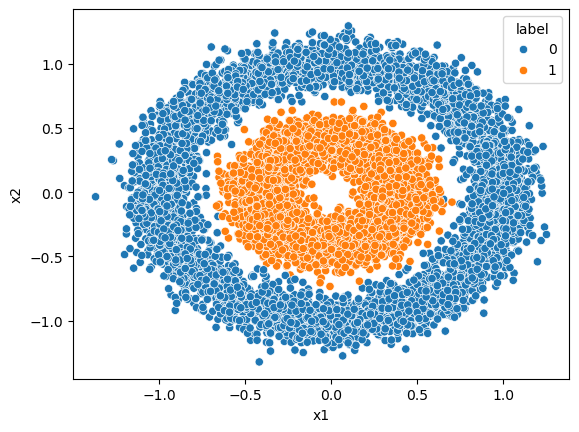

In [52]:
sns.scatterplot(x="x1",y="x2",data=df2,hue="label")

plt.show()

# Classification with multiple labels

In [54]:
df3=pd.read_csv("iris.csv")

In [55]:
df3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df3["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Figure size 700x500 with 0 Axes>

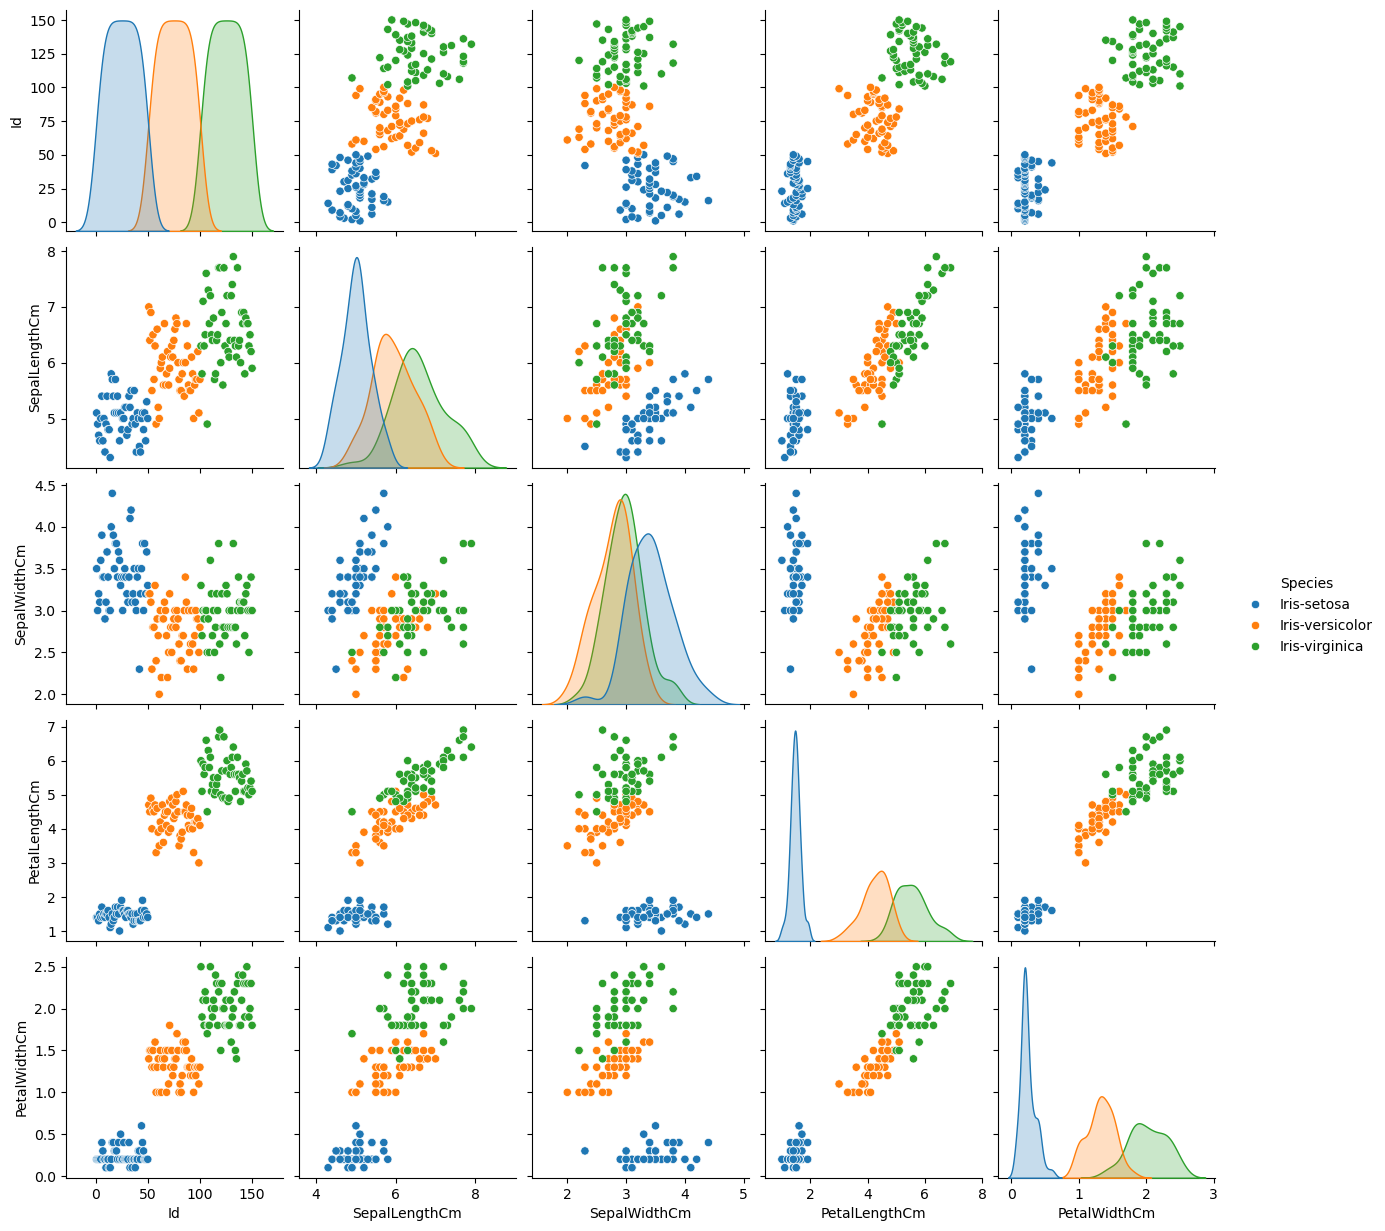

In [63]:
plt.figure(figsize=(7,5))
sns.pairplot(data=df3,hue='Species')
plt.show()

In [64]:
x3=df3.iloc[:,:-1]
y3=df3["Species"]

In [65]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2,random_state=42)

In [77]:
lr3=LogisticRegression(multi_class="ovr") # over or multinomial
lr3.fit(x3_train,y3_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [78]:
lr3.score(x3_test,y3_test)*100

100.0